In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np

spark = SparkSession.builder.appName("BDA-RenewableEnergy-Generation").getOrCreate()
egdata1_11 = pd.read_csv('./Datasets/ELEC_GENERATION_2001_2011.csv',encoding = "ISO-8859-1")
egdata1_11 = egdata1_11.replace('..',0)
egdata12_19 = pd.read_csv('./Datasets/ELEC_GENERATION_2012_2019.csv',encoding = "ISO-8859-1")
egdata12_19 = egdata12_19.replace('..',0)


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/07 12:24:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/05/07 12:24:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
frames = [egdata1_11, egdata12_19]
finalEGData = pd.concat(frames)
finalEGData

Country                  Technology Grid_Type  Year  \
0      Afghanistan          Solar photovoltaic  Off-grid  2000   
1      Afghanistan          Solar photovoltaic  Off-grid  2001   
2      Afghanistan          Solar photovoltaic  Off-grid  2002   
3      Afghanistan          Solar photovoltaic  Off-grid  2003   
4      Afghanistan          Solar photovoltaic  Off-grid  2004   
...            ...                         ...       ...   ...   
63931     Zimbabwe  Other non-renewable energy   On-grid  2015   
63932     Zimbabwe  Other non-renewable energy   On-grid  2016   
63933     Zimbabwe  Other non-renewable energy   On-grid  2017   
63934     Zimbabwe  Other non-renewable energy   On-grid  2018   
63935     Zimbabwe  Other non-renewable energy   On-grid  2019   

      Electricity_Generation_GWh  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
63931                          0  
63932                          0  
63933                          0  
63934                          0  
63935                          0  

[159840 rows x 5 columns]

In [3]:
uniqueValues = finalEGData['Technology'].unique()
print('Unique elements in column "Technology" ')
print(uniqueValues)

Unique elements in column "Technology" 
['Solar photovoltaic' 'Solar thermal energy' 'Onshore wind energy'
 'Offshore wind energy' 'Renewable hydropower' 'Pumped storage'
 'Marine energy' 'Solid biofuels' 'Renewable municipal waste'
 'Liquid biofuels' 'Biogas' 'Geothermal energy' 'Coal and peat' 'Oil'
 'Natural gas' 'Nuclear' 'Fossil fuels n.e.s.'
 'Other non-renewable energy']


In [4]:
reEnergyGenData = finalEGData[(finalEGData['Technology'].isin(['Solar photovoltaic','Solar thermal energy','Onshore wind energy','Offshore wind energy','Renewable hydropower','Pumped storage','Marine energy','Solid biofuels','Renewable municipal waste','Liquid biofuels','Biogas','Geothermal energy']))]
reEnergyGenData['Electricity_Generation_GWh'] = reEnergyGenData['Electricity_Generation_GWh'].astype(float)
reEnergyGenData

/var/folders/fq/zcp9nb297rvbf8h4hn1ccd6c0000gn/T/ipykernel_1624/318278406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reEnergyGenData['Electricity_Generation_GWh'] = reEnergyGenData['Electricity_Generation_GWh'].astype(float)


Country          Technology Grid_Type  Year  \
0      Afghanistan  Solar photovoltaic  Off-grid  2000   
1      Afghanistan  Solar photovoltaic  Off-grid  2001   
2      Afghanistan  Solar photovoltaic  Off-grid  2002   
3      Afghanistan  Solar photovoltaic  Off-grid  2003   
4      Afghanistan  Solar photovoltaic  Off-grid  2004   
...            ...                 ...       ...   ...   
63835     Zimbabwe   Geothermal energy   On-grid  2015   
63836     Zimbabwe   Geothermal energy   On-grid  2016   
63837     Zimbabwe   Geothermal energy   On-grid  2017   
63838     Zimbabwe   Geothermal energy   On-grid  2018   
63839     Zimbabwe   Geothermal energy   On-grid  2019   

       Electricity_Generation_GWh  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
63835                         0.0  
63836                         0.0  
63837                         0.0  
63838                         0.0  
63839                         0.0  

[106560 rows x 5 columns]

In [5]:
reEnergyGenData = reEnergyGenData.drop(['Grid_Type'], axis = 1)

In [6]:
#faster method
totalRenewGenData = reEnergyGenData.groupby(['Country','Year'])['Electricity_Generation_GWh'].sum().reset_index()
totalRenewGenData

#faster method
totalRenewGenSourceData = reEnergyGenData.groupby(['Technology','Year'])['Electricity_Generation_GWh'].sum().reset_index()
totalRenewGenSourceData

Technology  Year  Electricity_Generation_GWh
0            Biogas  2000                   13182.797
1            Biogas  2001                   14674.453
2            Biogas  2002                   16516.315
3            Biogas  2003                   18835.639
4            Biogas  2004                   20038.354
..              ...   ...                         ...
235  Solid biofuels  2015                  317543.009
236  Solid biofuels  2016                  338366.593
237  Solid biofuels  2017                  350243.167
238  Solid biofuels  2018                  365956.581
239  Solid biofuels  2019                  389146.873

[240 rows x 3 columns]

In [7]:
totalRenewGenData['Total_Electricity_Generation_TWh'] = totalRenewGenData['Electricity_Generation_GWh']*0.001
totalRenewGenData['Year'] = totalRenewGenData['Year'].astype(int)
totalRenewGenData.dtypes

totalRenewGenSourceData['Total_Electricity_Generation_TWh'] = totalRenewGenSourceData['Electricity_Generation_GWh']*0.001
totalRenewGenSourceData['Year'] = totalRenewGenData['Year'].astype(int)


In [8]:
totalTopRenewGenData = totalRenewGenData.sort_values('Total_Electricity_Generation_TWh',ascending = False).groupby('Year').head(10)
totalTopRenewGenData.sort_values('Year')

totalTopRenewGenSourceData = totalRenewGenSourceData.sort_values('Total_Electricity_Generation_TWh',ascending = False).groupby('Year').head(10)
totalTopRenewGenSourceData.sort_values('Year',ascending = False)

Technology  Year  Electricity_Generation_GWh  \
159       Renewable hydropower  2019                 4207123.616   
99        Offshore wind energy  2019                   84330.258   
239             Solid biofuels  2019                  389146.873   
19                      Biogas  2019                   91818.675   
39           Geothermal energy  2019                   92047.188   
..                         ...   ...                         ...   
160  Renewable municipal waste  2000                   18635.791   
140       Renewable hydropower  2000                 2626416.571   
60               Marine energy  2000                     545.889   
200       Solar thermal energy  2000                     526.000   
20           Geothermal energy  2000                   52567.029   

     Total_Electricity_Generation_TWh  
159                       4207.123616  
99                          84.330258  
239                        389.146873  
19                          91.818675  
39                          92.047188  
..                                ...  
160                         18.635791  
140                       2626.416571  
60                           0.545889  
200                          0.526000  
20                          52.567029  

[200 rows x 4 columns]

In [9]:
yearList = totalRenewGenData['Year'].unique()
np.sort(yearList)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [11]:
import seaborn as sns
totalTopCountryGenCapRenew_PandaDF = totalTopRenewGenData[(totalTopRenewGenData['Country'].isin(['China','United States of America','Brazil','India','Germany','Canada']))].reset_index()
yearList = totalTopCountryGenCapRenew_PandaDF['Year'].unique()
sns.set_theme(style="ticks")
g = sns.FacetGrid(totalTopCountryGenCapRenew_PandaDF, col="Country", col_wrap=2, height=20, ylim=(0, 2200))
g.map(sns.pointplot, "Year", "Total_Electricity_Generation_TWh", order=np.sort(yearList), color=".6", ci=None)

Text(0.5, 1.0, 'Top countries generating electricity from renewable source')

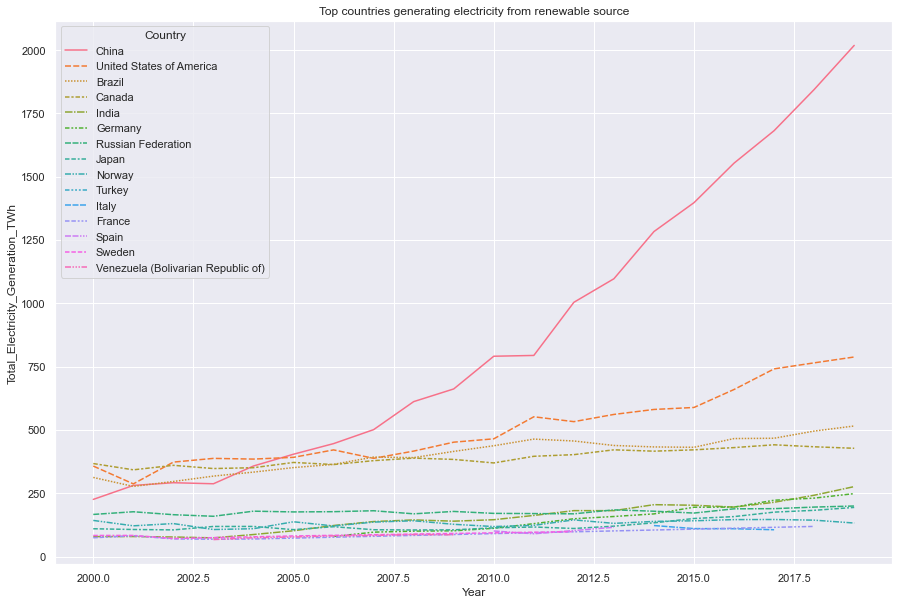

In [12]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(15,10)})
# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Total_Electricity_Generation_TWh",
             hue="Country", style="Country",sizes=(100, 300),
             data=totalTopRenewGenData).set_title('Top countries generating electricity from renewable source')

Text(0.5, 1.0, 'electricity from renewable source all around the world from different source')

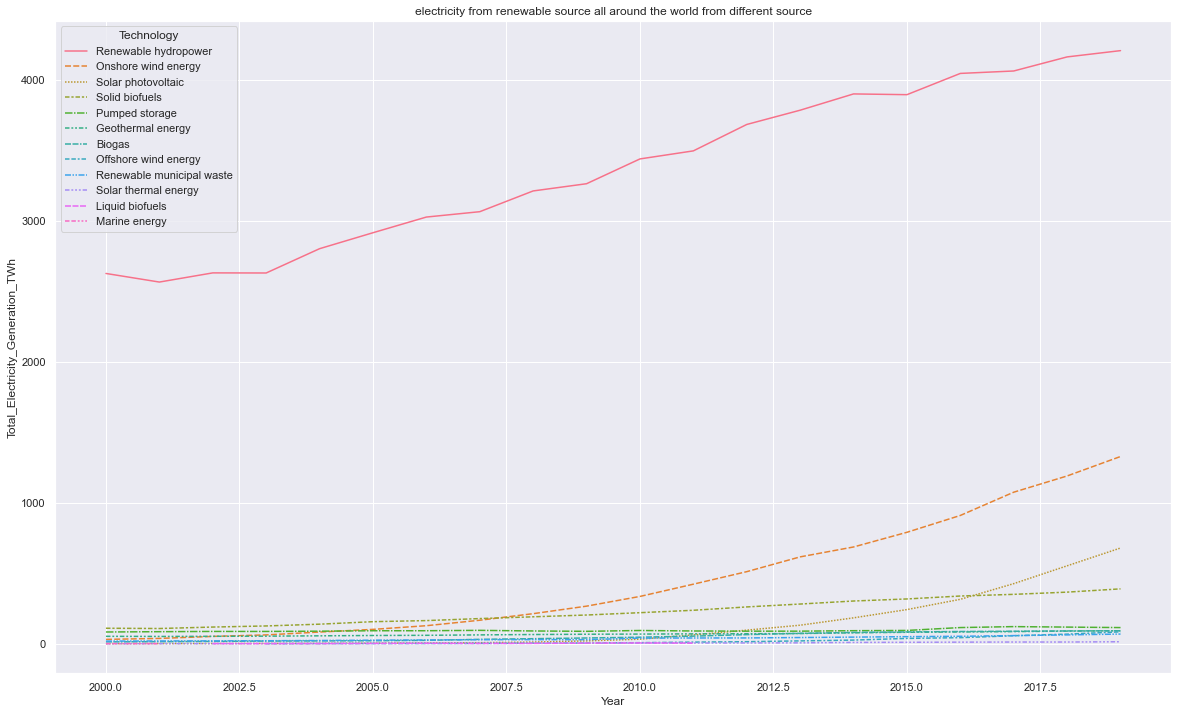

In [13]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,12)})
# Plot the responses for different events and regions
sns.lineplot(x="Year", y="Total_Electricity_Generation_TWh",
             hue="Technology", style="Technology",sizes=(200, 350),
             data=totalTopRenewGenSourceData).set_title('electricity from renewable source all around the world from different source')

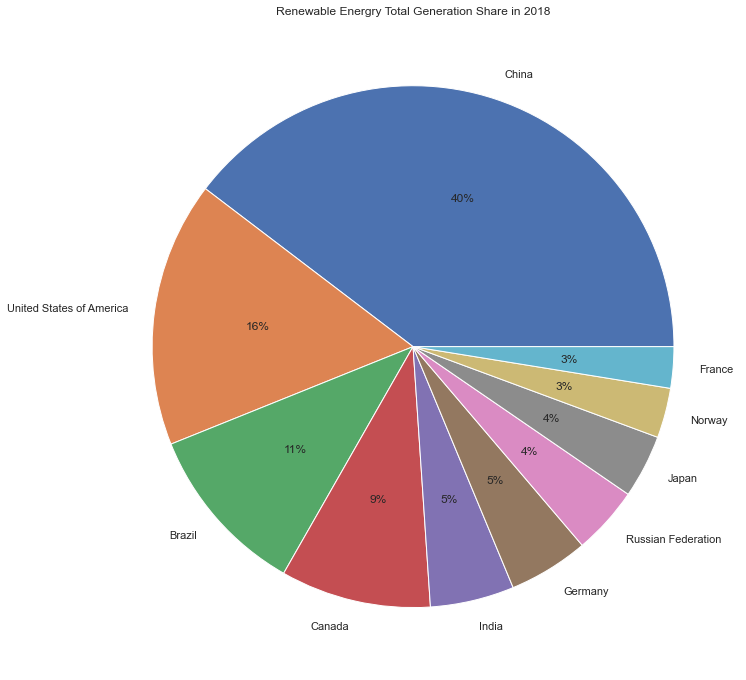

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
totalRenewGenData2018 = totalTopRenewGenData.query('Year == 2018')
plt.pie(totalRenewGenData2018["Total_Electricity_Generation_TWh"], labels=totalRenewGenData2018["Country"], autopct='%1.0f%%')
plt.title("Renewable Energry Total Generation Share in 2018")
plt.show()

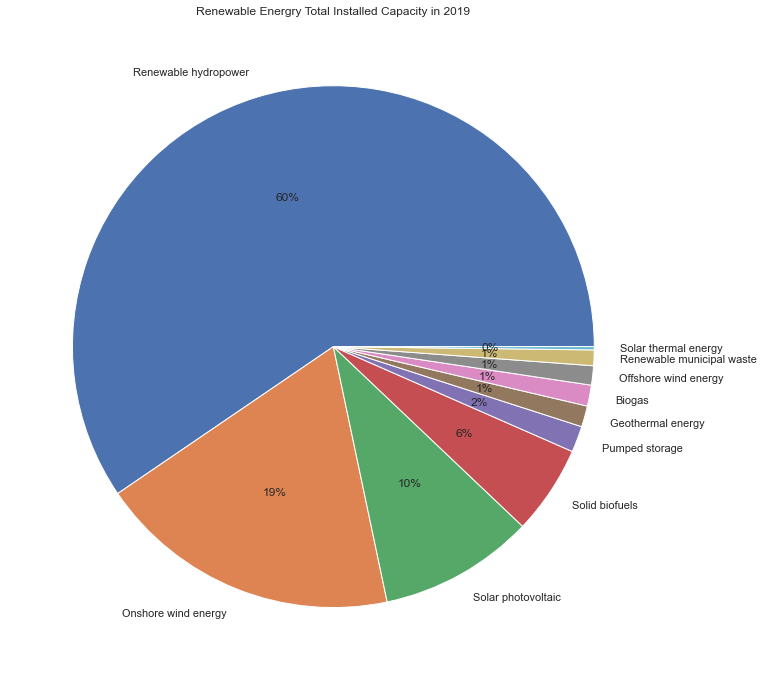

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
totalRenewGenDataSource2018 = totalTopRenewGenSourceData.query('Year == 2019')
plt.pie(totalRenewGenDataSource2018["Total_Electricity_Generation_TWh"], labels=totalRenewGenDataSource2018["Technology"], autopct='%1.0f%%')
plt.title("Renewable Energry Total Installed Capacity in 2019")
plt.show()

In [16]:
#Emisison Factor Calculation for Co2
# 0.85 pounds of CO2 emissions per kWh - https://www.eia.gov/tools/faqs/faq.php?id=74&t=11
# one Terawatt Hour is equal to 1,00,00,00,000 Kilowatt Hours = 850000000 pounds of c02/2204.62 =  385553.97 metric tons = 0.38 million metric tons

totalRenewGenData["CO2_Emission_Prevented_MT"] = totalRenewGenData["Total_Electricity_Generation_TWh"] * 0.38
totalRenewGenData

totalTopRenewGenSourceData["CO2_Emission_Prevented_MT"] = totalTopRenewGenSourceData["Total_Electricity_Generation_TWh"] * 0.38
totalTopRenewGenSourceData

Technology  Year  Electricity_Generation_GWh  \
159  Renewable hydropower  2019                 4207123.616   
158  Renewable hydropower  2018                 4162558.170   
157  Renewable hydropower  2017                 4062726.036   
156  Renewable hydropower  2016                 4045477.225   
154  Renewable hydropower  2014                 3900023.835   
..                    ...   ...                         ...   
202  Solar thermal energy  2002                     569.000   
201  Solar thermal energy  2001                     565.000   
60          Marine energy  2000                     545.889   
200  Solar thermal energy  2000                     526.000   
61          Marine energy  2001                     523.538   

     Total_Electricity_Generation_TWh  CO2_Emission_Prevented_MT  
159                       4207.123616                1598.706974  
158                       4162.558170                1581.772105  
157                       4062.726036                1543.835894  
156                       4045.477225                1537.281346  
154                       3900.023835                1482.009057  
..                                ...                        ...  
202                          0.569000                   0.216220  
201                          0.565000                   0.214700  
60                           0.545889                   0.207438  
200                          0.526000                   0.199880  
61                           0.523538                   0.198944  

[200 rows x 5 columns]

In [17]:
totalTopCo2Data = totalRenewGenData.sort_values('CO2_Emission_Prevented_MT',ascending = False).groupby('Year').head(10)
totalTopCo2Data.sort_values('Year')
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(15,10)})
# Plot the responses for different events and regions
sns.lineplot(x="Year", y="CO2_Emission_Prevented_MT",
             hue="Country", style="Country",sizes=(100, 300),
             data=totalTopCo2Data).set_title('Country wise Co2 gas emission prevented in metric tons through renewable electricity')

Text(0.5, 1.0, 'Country wise Co2 gas emission prevented in metric tons through renewable electricity')

Text(0.5, 1.0, 'Technology wise Co2 gas emission prevented in metric tons through renewable electricity')

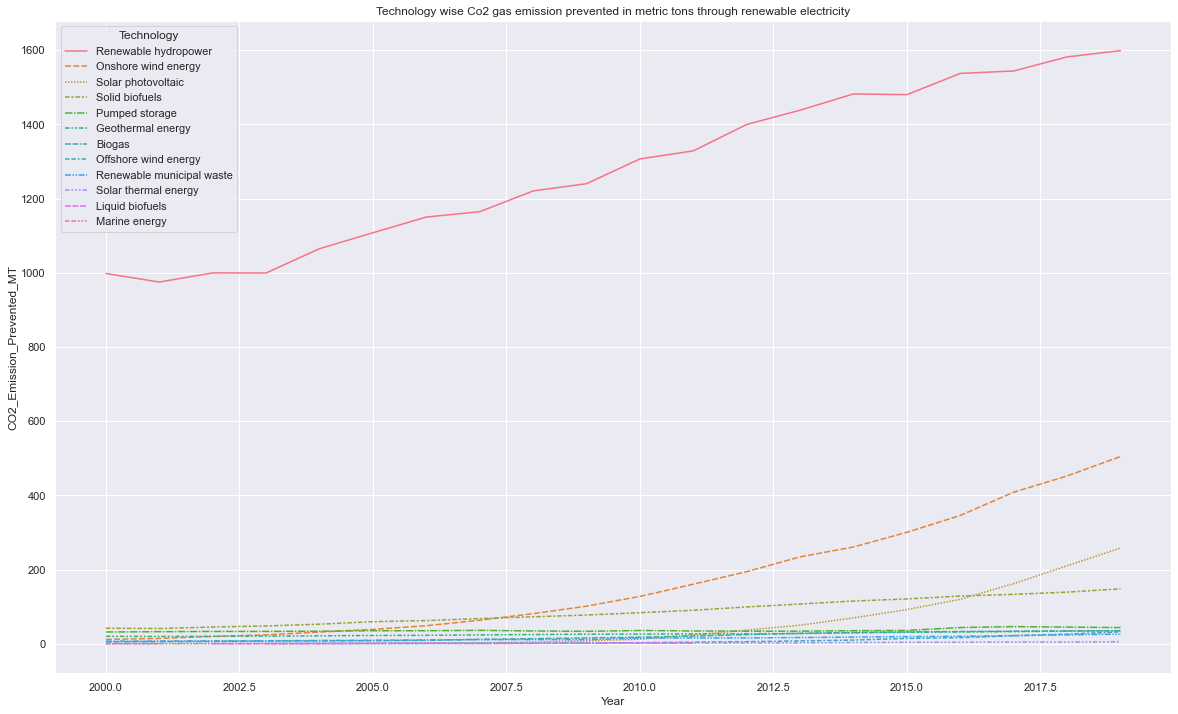

In [138]:
totalTopCo2SourceData = totalTopRenewGenSourceData.sort_values('CO2_Emission_Prevented_MT',ascending = False).groupby('Year').head(10)
totalTopCo2SourceData.sort_values('Year')
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,12)})
# Plot the responses for different events and regions
sns.lineplot(x="Year", y="CO2_Emission_Prevented_MT",
             hue="Technology", style="Technology",sizes=(100, 300),
             data=totalTopCo2SourceData).set_title('Technology wise Co2 gas emission prevented in metric tons through renewable electricity')

In [20]:
#Prepare data for prediction model
worldReEnergyGenData = totalRenewGenData.groupby('Year')['Total_Electricity_Generation_TWh','CO2_Emission_Prevented_MT'].sum().reset_index()
worldReEnergyGenData

#Prepare data for prediction model
worldReEnergyGenSourceTypeData = totalTopRenewGenSourceData.groupby('Technology')['Total_Electricity_Generation_TWh','CO2_Emission_Prevented_MT'].sum().reset_index()
worldReEnergyGenSourceTypeData


/var/folders/fq/zcp9nb297rvbf8h4hn1ccd6c0000gn/T/ipykernel_1624/1615312015.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  worldReEnergyGenData = totalRenewGenData.groupby('Year')['Total_Electricity_Generation_TWh','CO2_Emission_Prevented_MT'].sum().reset_index()
/var/folders/fq/zcp9nb297rvbf8h4hn1ccd6c0000gn/T/ipykernel_1624/1615312015.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  worldReEnergyGenSourceTypeData = totalTopRenewGenSourceData.groupby('Technology')['Total_Electricity_Generation_TWh','CO2_Emission_Prevented_MT'].sum().reset_index()


Technology  Total_Electricity_Generation_TWh  \
0                      Biogas                        995.706999   
1           Geothermal energy                       1370.679474   
2             Liquid biofuels                         25.490108   
3               Marine energy                          1.069427   
4        Offshore wind energy                        384.729392   
5         Onshore wind energy                       9006.123257   
6              Pumped storage                       1907.044929   
7        Renewable hydropower                      67411.337576   
8   Renewable municipal waste                        743.989548   
9          Solar photovoltaic                       2777.278796   
10       Solar thermal energy                         81.939297   
11             Solid biofuels                       4558.135206   

    CO2_Emission_Prevented_MT  
0                  378.368660  
1                  520.858200  
2                    9.686241  
3                    0.406382  
4                  146.197169  
5                 3422.326838  
6                  724.677073  
7                25616.308279  
8                  282.716028  
9                 1055.365942  
10                  31.136933  
11                1732.091378

Text(0, 0.5, 'Electricity Generation and Prevented C02 Emission')

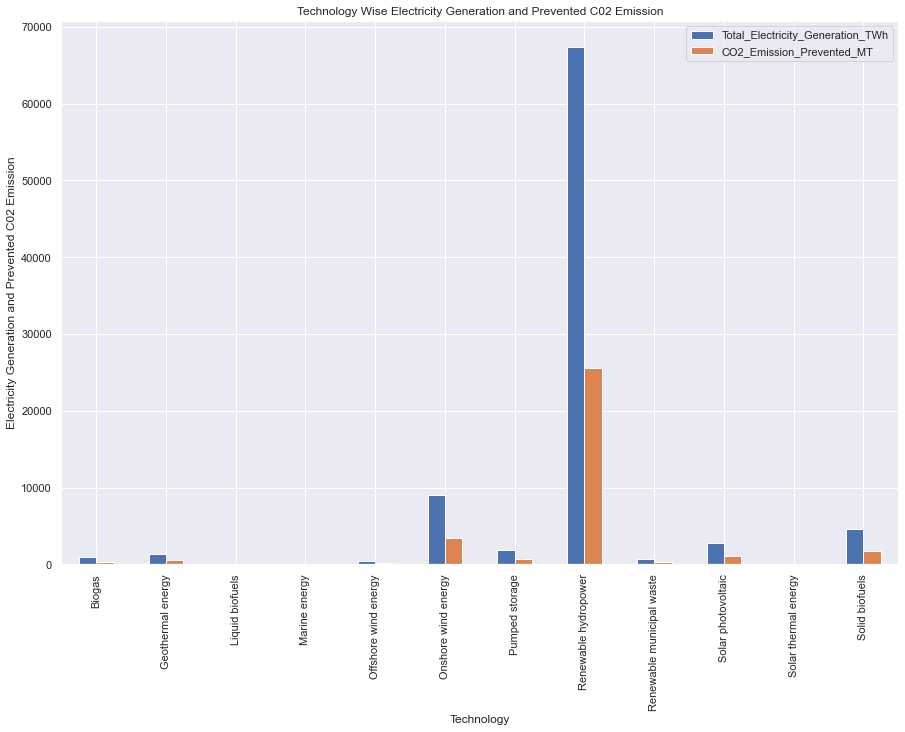

In [21]:
worldReEnergyGenSourceTypeData.reset_index().plot(
    x="Technology", y=["Total_Electricity_Generation_TWh", "CO2_Emission_Prevented_MT"], kind="bar"
)
plt.title("Technology Wise Electricity Generation and Prevented C02 Emission")
plt.xlabel("Technology")
plt.ylabel("Electricity Generation and Prevented C02 Emission")

In [22]:
#matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(15, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

worldReEnergyGenData.plot(x ='Year',label='CO2_Emission_Prevented_MT', ylabel = 'CO2_Emission_Prevented_MT',
                          title="Worldwide Electricity Generation and Co2 Emission Prevented from renewable sources")
plt.legend()

In [23]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pyspark.ml.feature import StandardScaler
from sklearn.model_selection import train_test_split

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.25 * len(worldReEnergyGenData)))

# Separating the label here, we want to predict the AdjClose
worldReEnergyGenData['label'] = worldReEnergyGenData['CO2_Emission_Prevented_MT'].shift(-1)
X = np.array(worldReEnergyGenData.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(worldReEnergyGenData['label'])
y = y[:-forecast_out]

# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear regression
reEnLinearReg = LinearRegression(n_jobs=-1)
reEnLinearReg.fit(X_train, y_train)
confidencereg = reEnLinearReg.score(X_test, y_test)
print("The linear regression confidence is ",confidencereg)

# Printing the forecast
forecast_set = reEnLinearReg.predict(X_lately)
print(forecast_set, forecast_out)

The linear regression confidence is  0.9926004787068485
[2229.96866118 2372.80799553 2496.22571555 2632.37736903 2762.66054092] 5


/var/folders/fq/zcp9nb297rvbf8h4hn1ccd6c0000gn/T/ipykernel_1624/906435952.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(worldReEnergyGenData.drop(['label'], 1))


In [24]:
from datetime import date
last_date = worldReEnergyGenData.iloc[-1].name
last_unix = last_date
next_unix = last_unix + 1
for i in forecast_set:
    next_date = next_unix
    next_date = next_date + 1
    next_unix = next_date
    worldReEnergyGenData.loc[next_date] = [np.nan for _ in range(len(worldReEnergyGenData.columns)-1)]+[i]
#Predicted value - Label
worldReEnergyGenData

Year  Total_Electricity_Generation_TWh  CO2_Emission_Prevented_MT  \
0   2000.0                       2936.648157                1115.926300   
1   2001.0                       2884.480491                1096.102587   
2   2002.0                       2980.923957                1132.751104   
3   2003.0                       3003.681730                1141.399057   
4   2004.0                       3217.232668                1222.548414   
5   2005.0                       3378.612295                1283.872672   
6   2006.0                       3532.389206                1342.307898   
7   2007.0                       3639.156098                1382.879317   
8   2008.0                       3855.389387                1465.047967   
9   2009.0                       3988.791918                1515.740929   
10  2010.0                       4290.184352                1630.270054   
11  2011.0                       4492.096741                1706.996762   
12  2012.0                       4842.499031                1840.149632   
13  2013.0                       5124.906719                1947.464553   
14  2014.0                       5411.775846                2056.474821   
15  2015.0                       5610.660049                2132.050819   
16  2016.0                       6008.512457                2283.234734   
17  2017.0                       6344.012729                2410.724837   
18  2018.0                       6720.394667                2553.749973   
19  2019.0                       7077.936134                2689.615731   
21     NaN                               NaN                        NaN   
22     NaN                               NaN                        NaN   
23     NaN                               NaN                        NaN   
24     NaN                               NaN                        NaN   
25     NaN                               NaN                        NaN   

          label  
0   1096.102587  
1   1132.751104  
2   1141.399057  
3   1222.548414  
4   1283.872672  
5   1342.307898  
6   1382.879317  
7   1465.047967  
8   1515.740929  
9   1630.270054  
10  1706.996762  
11  1840.149632  
12  1947.464553  
13  2056.474821  
14  2132.050819  
15  2283.234734  
16  2410.724837  
17  2553.749973  
18  2689.615731  
19          NaN  
21  2229.968661  
22  2372.807996  
23  2496.225716  
24  2632.377369  
25  2762.660541

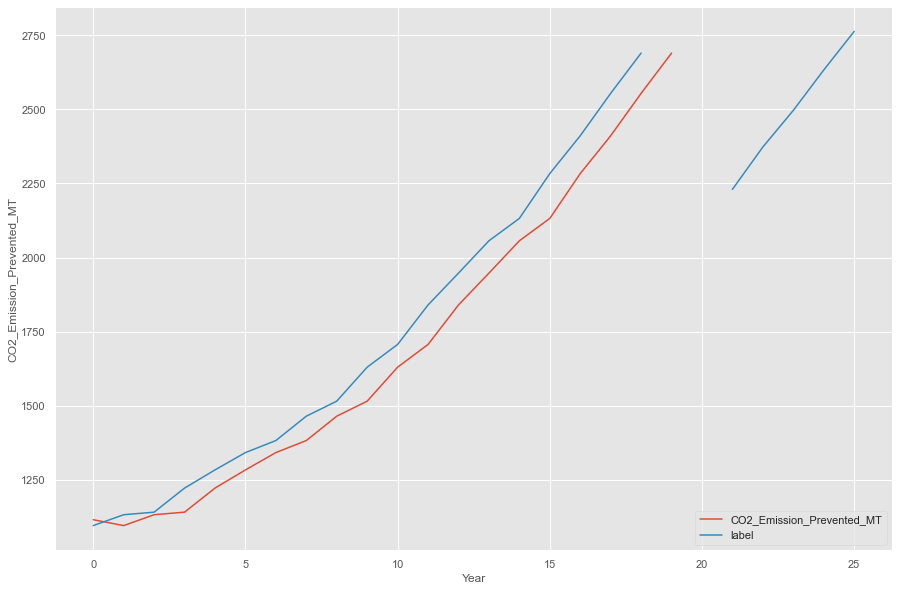

In [25]:
#matplotlib inline
import matplotlib.pyplot as plt
worldReEnergyGenData['CO2_Emission_Prevented_MT'].plot()
worldReEnergyGenData['label'].plot()
plt.legend(loc=4)
plt.xlabel('Year')
plt.ylabel('CO2_Emission_Prevented_MT')
plt.show()

In [27]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import RobustScaler
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

worldReEnergyGenDataSource_RDD=spark.createDataFrame(totalTopRenewGenSourceData) 
(trainingData, testData) = worldReEnergyGenDataSource_RDD.randomSplit([0.7, 0.3])
#--------
indexer = StringIndexer(inputCol="Technology", outputCol="TechIndex")
assembler = VectorAssembler(inputCols=["TechIndex","Year","Total_Electricity_Generation_TWh","CO2_Emission_Prevented_MT"], outputCol='features')
#--------
scaler = MinMaxScaler(inputCol='features', outputCol='scaledFeatures') #Error mean in test data is 18.2
#OR
#scaler = RobustScaler(inputCol="features", outputCol="scaledFeatures",withScaling=True, withCentering=False,lower=0.25, upper=0.75) #Error mean in test data is 23.1
#OR
#scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",withStd=True, withMean=False) # 37.3

# Create a RandomForest model.
rf = RandomForestRegressor(featuresCol="scaledFeatures",  labelCol='CO2_Emission_Prevented_MT')

# Chain model, assembler and scaler into a Pipeline.
pipeline = Pipeline(stages=[indexer,assembler, scaler, rf])

# Train model on training data. 
rf_model = pipeline.fit(trainingData)


# Make predictions.
predictions = rf_model.transform(testData)

#predictions.show()

# Select example rows to display.
predictions.select("Technology","Year","CO2_Emission_Prevented_MT","prediction","features").orderBy("CO2_Emission_Prevented_MT", ascending=False).show(30)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="CO2_Emission_Prevented_MT", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

rfModel = rf_model.stages[1]
print(rfModel)  # summary only

+--------------------+----+-------------------------+------------------+--------------------+
|          Technology|Year|CO2_Emission_Prevented_MT|        prediction|            features|
+--------------------+----+-------------------------+------------------+--------------------+
|Renewable hydropower|2018|       1581.7721046000001|1539.4686686279415|[0.0,2018.0,4162....|
|Renewable hydropower|2015|            1479.99098674|1532.3429235429414|[0.0,2015.0,3894....|
|Renewable hydropower|2000|             998.03829698| 997.0457582330833|[0.0,2000.0,2626....|
| Onshore wind energy|2014|             260.77689696| 207.9358396711917|[6.0,2014.0,686.2...|
| Onshore wind energy|2010|             127.46051694|  115.250701949204|[6.0,2010.0,335.4...|
|      Solid biofuels|2015|       120.66634342000002|119.20072038451113|[1.0,2015.0,317.5...|
|  Solar photovoltaic|2015|              92.01796634|102.04787439319722|[4.0,2015.0,242.1...|
| Onshore wind energy|2008|              81.00864358| 91.608